In [1]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import fmax as fm
import numpy as np
import arviz as az

In [2]:
def plot_posterior_predictive(fcast_model, label):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.posterior_predictive_samples
    index = fcast_model.train_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(13,8))

    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(index, medians, label="Median")
    axs.plot(index, fcast_model.train_data, color="red", label="Training")
    axs.legend()
    axs.set_xlabel("Period")
    axs.set_ylabel("Record")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [3]:
def plot_forecast(fcast_model, test_data, label, actual):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(13,8))
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(index, medians, label="Median")
    axs.plot(fcast_model.train_index, fcast_model.train_data, color="red", label="Training")
    axs.plot(fcast_model.fcast_index, test_data, color="black", label="Tryfos")
    axs.plot(fcast_model.fcast_index, actual, color="green", label="Actual")
    axs.legend()
    axs.set_xlabel("Period")
    axs.set_ylabel("Record")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [4]:
def plot_forecast_fin(fcast_model, test_data, label, actual):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(13,8))
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    axs.set_xlabel("Period")
    axs.set_ylabel("Record")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [5]:
def plot_forecast_small(fcast_model, test_data, label, actual):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(8,5))
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    #axs.set_xlabel("Period")
    #axs.set_ylabel("Record")
    #axs.set_title(label)

    fig.tight_layout()

    return fig

In [6]:
whiches = ["1000m", "1m", "5000m", "Marathon", "10000m"]
which = whiches[0]

In [7]:
df = pd.read_csv("tryfos_data.csv")
years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

training_years = years[:15]
training_records = records[:15]
tryfos_years = years[15:]
tryfos_fcast = records[15:]

actual_df = pd.read_csv("tryfos_actual.csv")
_, actual_records = actual_df["Year"].values, actual_df[which].values

prior_parameters = {
        'mu' : {
            'mean' : training_records[0],
            'std' : 0.05*training_records[0],
        },
        'sigma' : {
            'lam' : 1/13
        }
    }

model = fm.ForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gumbel", 
                            kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
model.fit(chains=1, draws=10000, tune=3000)
model.posterior_predictive()
model.forecast()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 3_000 tune and 10_000 draw iterations (3_000 + 10_000 draws total) took 16 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'sigma'}>,
       <AxesSubplot:title={'center':'log_like_holdout'}>], dtype=object)

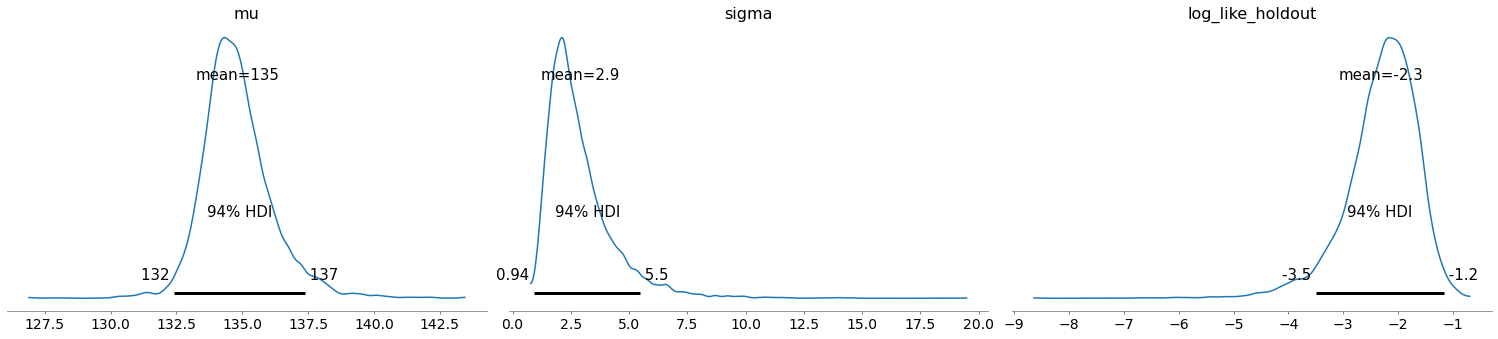

In [9]:
az.plot_posterior(model.trace)

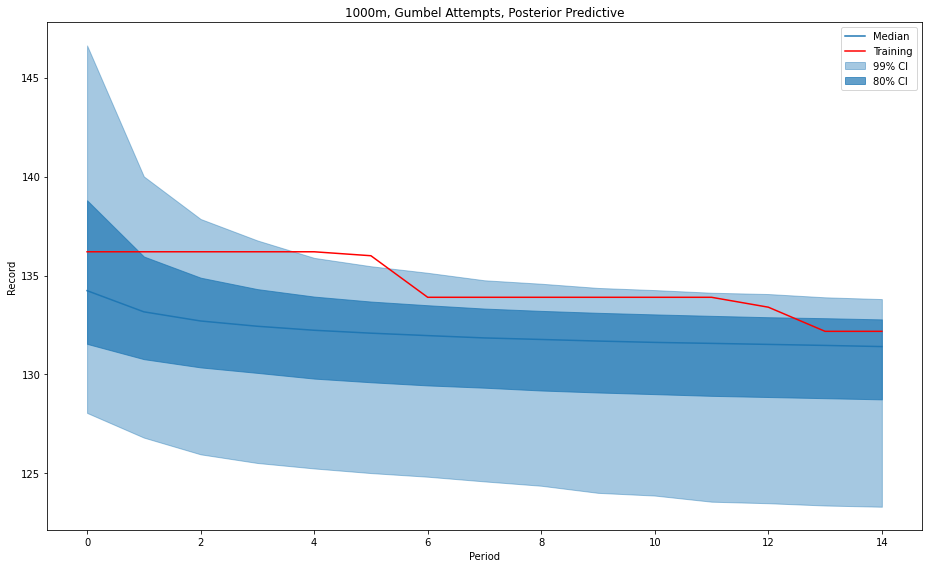

In [10]:
fig = plot_posterior_predictive(model, f"{which}, Gumbel Attempts, Posterior Predictive")

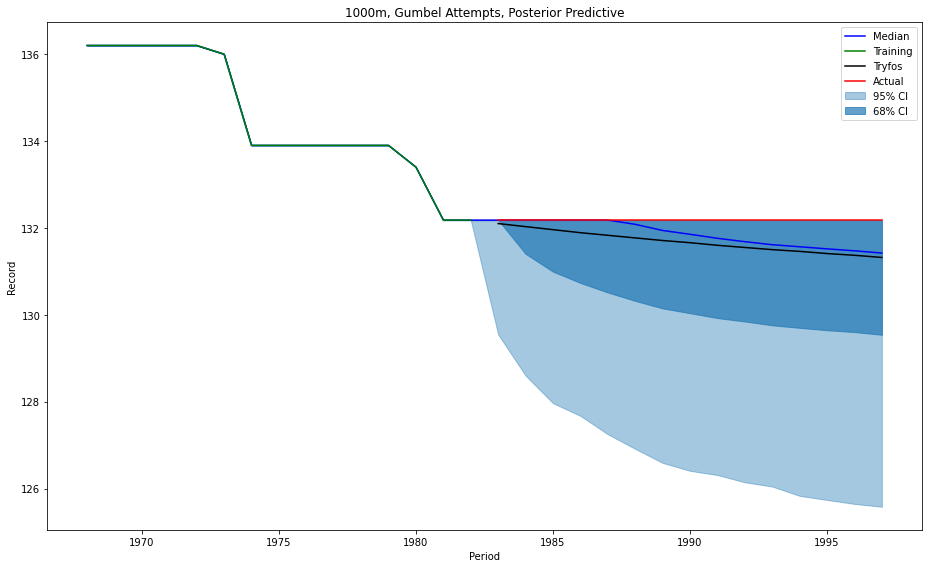

In [11]:
fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gumbel Attempts, Posterior Predictive",  actual_records)

# Now do them all

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 5_000 tune and 20_000 draw iterations (5_000 + 20_000 draws total) took 28 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 5_000 tune and 20_000 draw iterations (5_000 + 20_000 draws total) took 37 seconds.
There were 1008 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 5_000 tune and 20_000 draw iterations (5_000 + 20_000 draws total) took 35 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 5_000 tune and 20_000 draw iterations (5_000 + 20_000 draws total) took 52 seconds.
There were 3114 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 5_000 tune and 20_000 draw iterations (5_000 + 20_000 draws total) took 44 seconds.
There were 3880 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


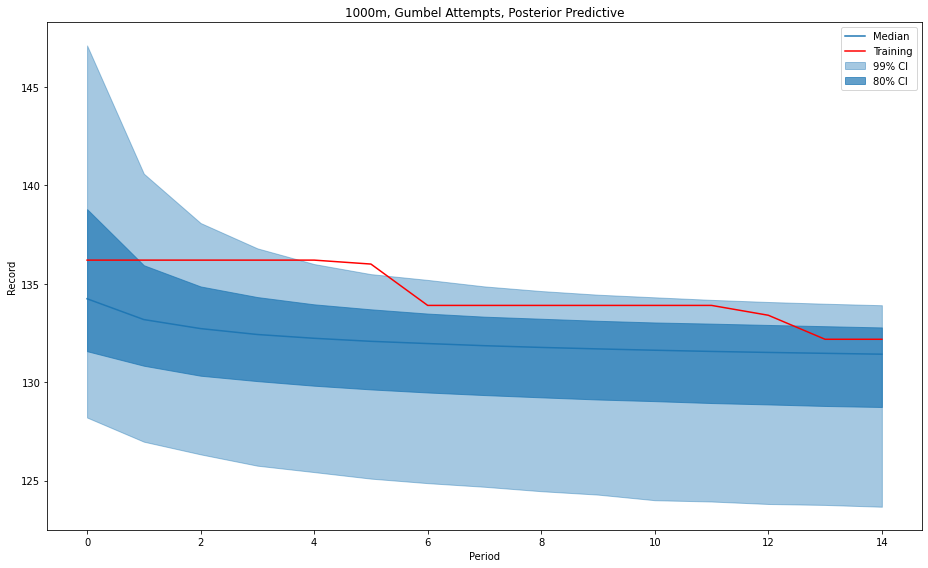

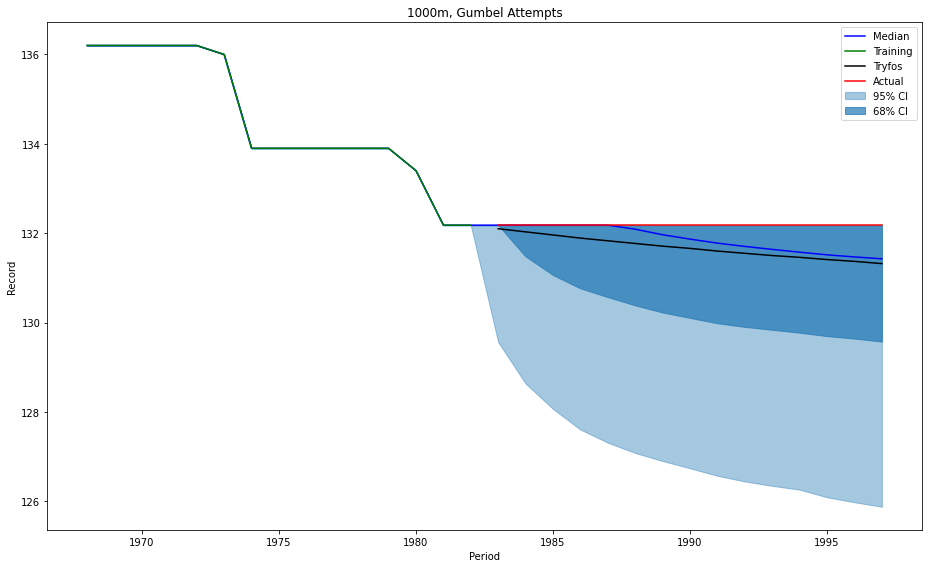

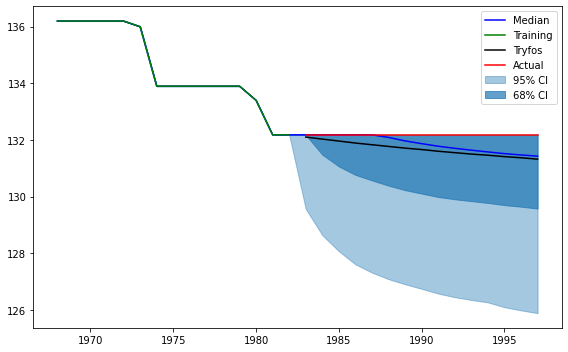

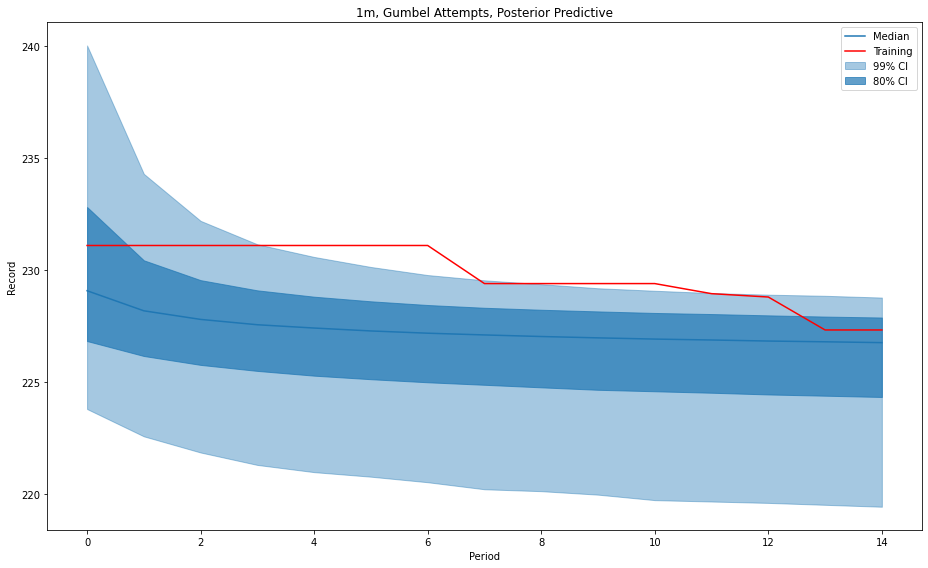

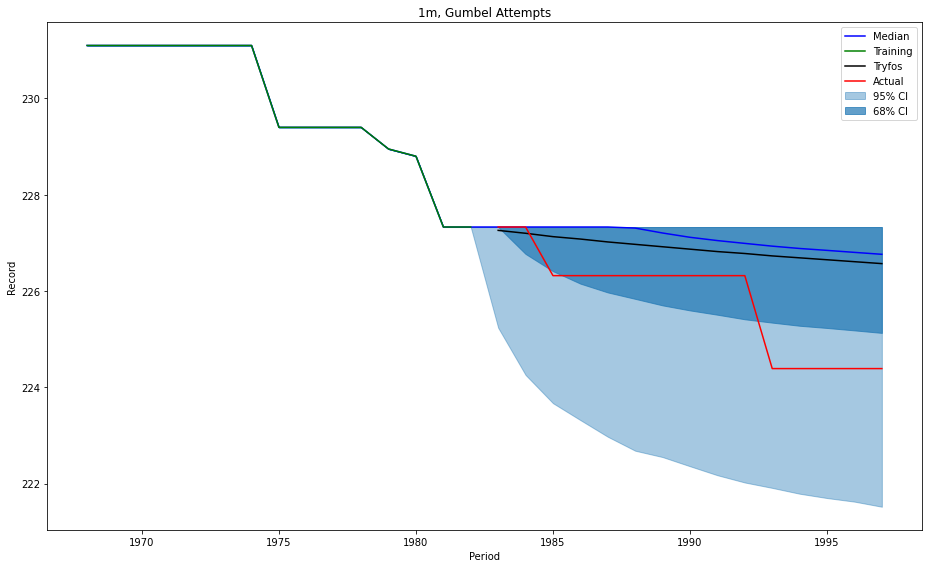

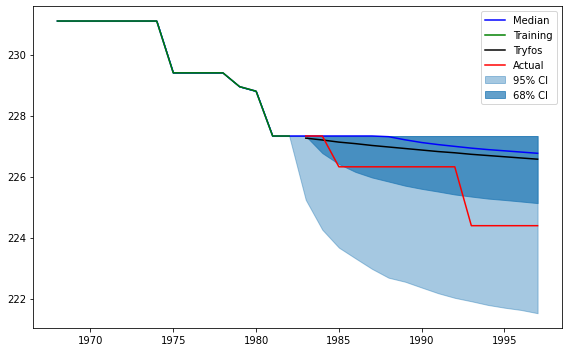

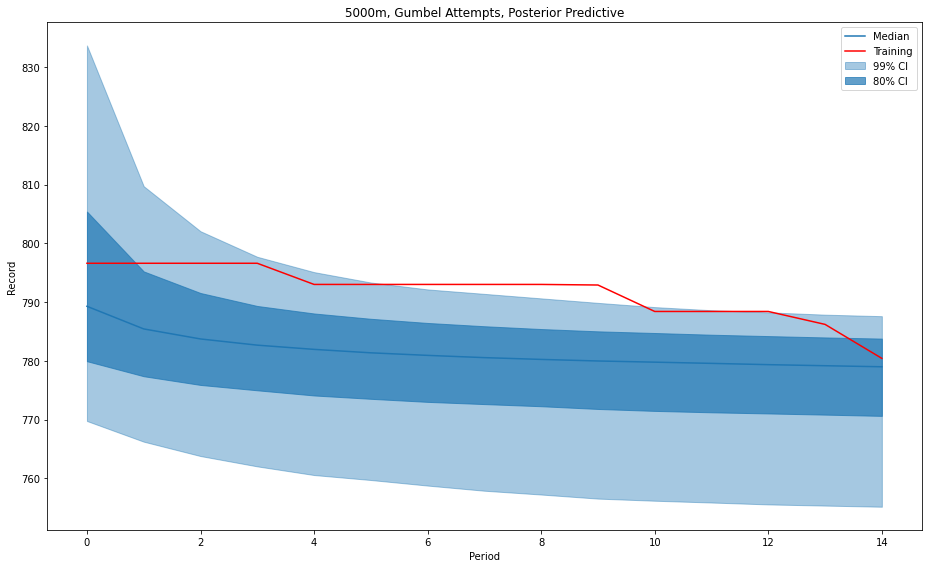

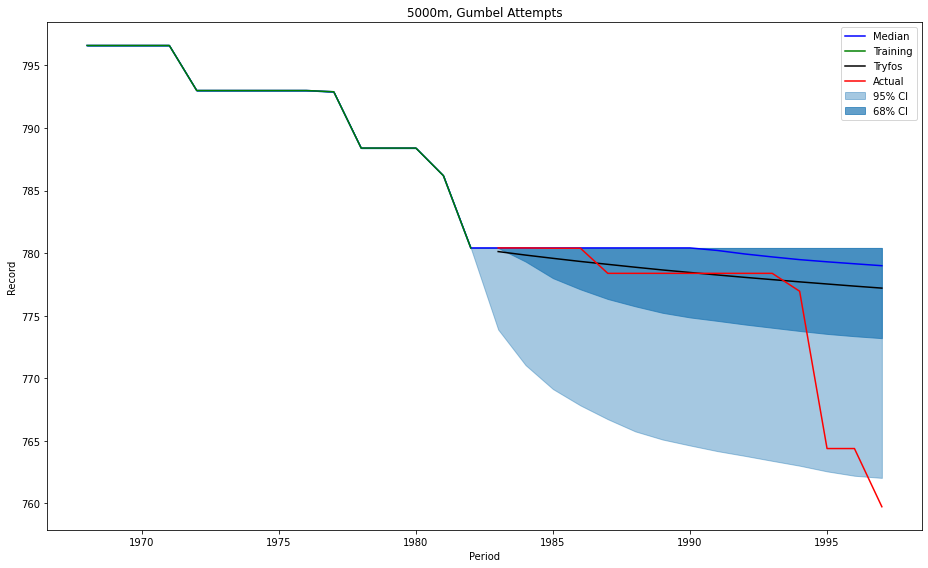

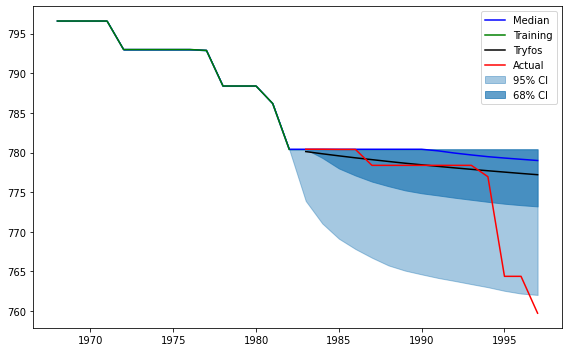

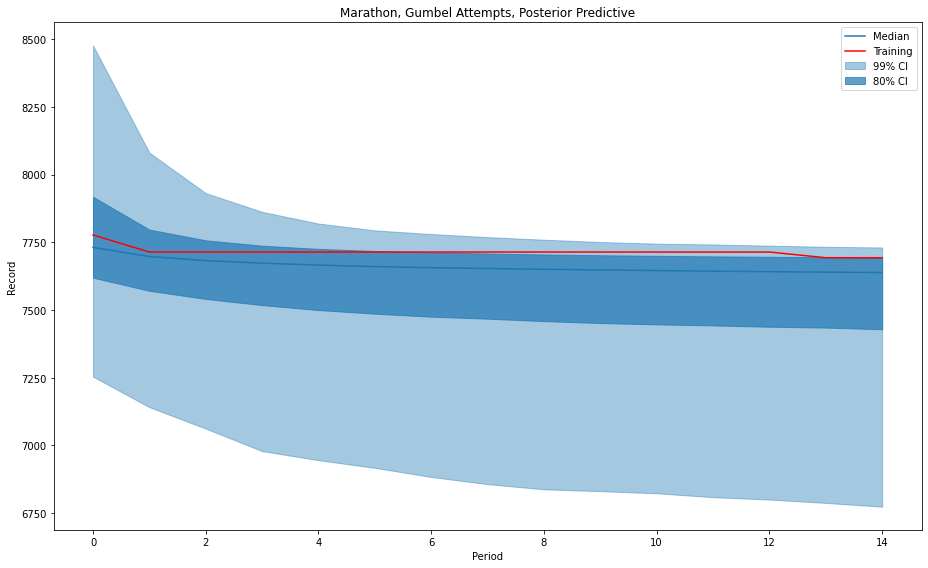

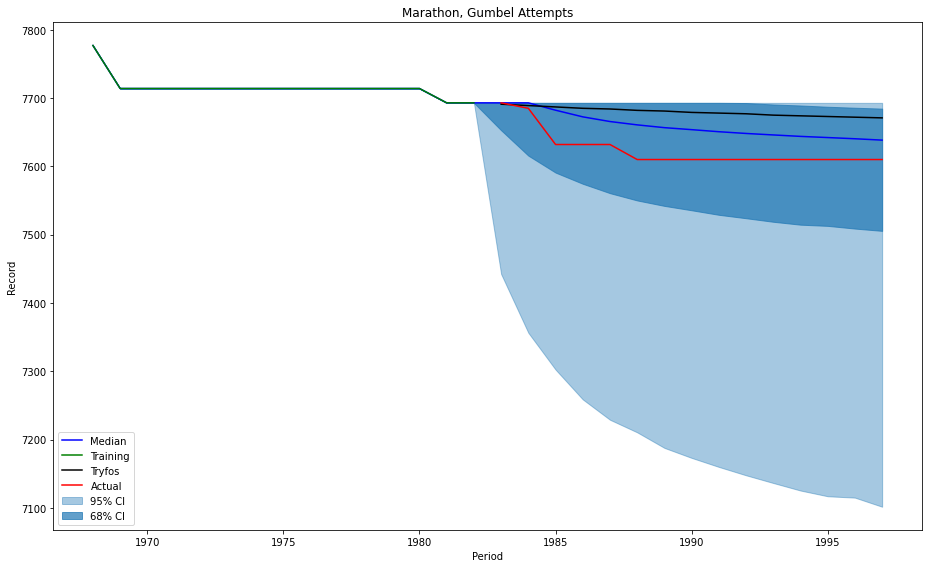

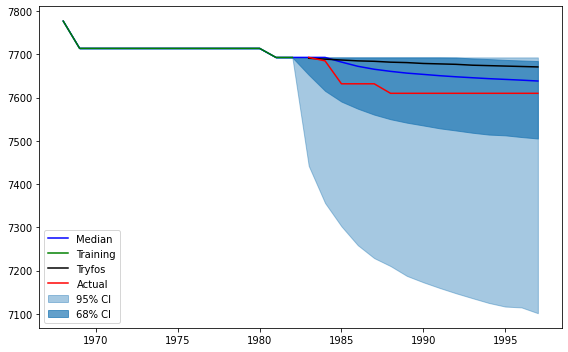

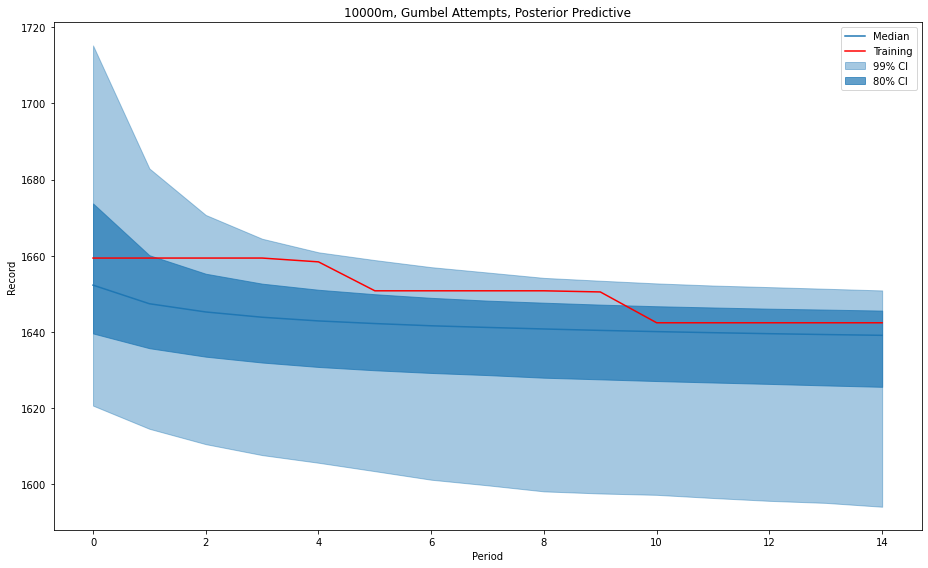

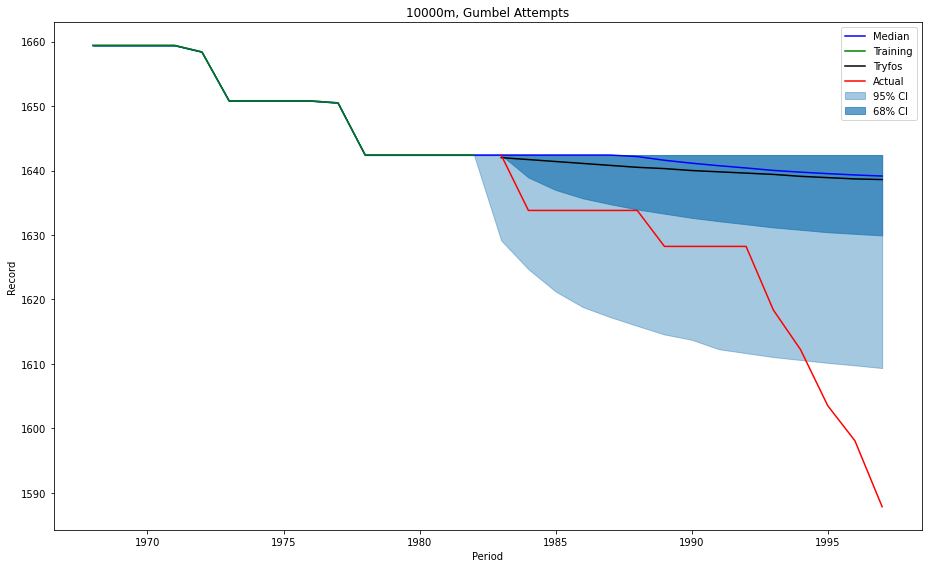

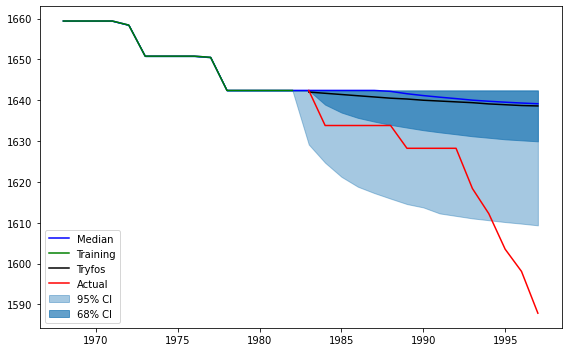

In [12]:
#whiches = ["1m", "5000m", "10000m", "Marathon"]
whiches = ["1000m", "1m", "5000m", "Marathon", "10000m"]
#whiches = []

mses = {}
avg_log_probs = {}

fails = []

#whiches = ["1000m"]
for which in whiches:

    try:

        df = pd.read_csv("tryfos_data.csv")
        years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

        training_years = years[:15]
        training_records = records[:15]
        tryfos_years = years[15:]
        tryfos_fcast = records[15:]

        actual_df = pd.read_csv("tryfos_actual.csv")
        _, actual_records = actual_df["Year"].values, actual_df[which].values

        prior_parameters = {
                'mu' : {
                    'mean' : training_records[0],
                    'std' : 0.05*training_records[0],
                },
                'sigma' : {
                    'lam' : 1/(0.1*training_records[0])
                }
            }

        model = fm.ForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gumbel", 
                                    kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
        model.fit(chains=1)
        model.posterior_predictive()
        model.forecast()

        # MSE calculation
        median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
        bayes_mse = fm.mse(median, model.fcast_test_data)
        tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
        mses[which] = (bayes_mse, tryfos_mse)

        # Average logp
        avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])

        # Plots
        fig = plot_posterior_predictive(model, f"{which}, Gumbel Attempts, Posterior Predictive")
        fig.savefig(f"final_{which}_gumbel_attempts_post_pred.png")

        # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
        # fig.savefig(f"{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"final_{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"s_final_{which}_gumbel_attempts_forecast.png")



    except:
       print(f"Error: failed on {which}")
       fails.append(which)

In [13]:
mses

{'1000m': (0.18092228655427955, 0.30973333333333847),
 '1m': (2.440137010432568, 1.9230733333333596),
 '5000m': (56.13160383547499, 43.3707066666667),
 'Marathon': (1357.3136428937555, 3500.8),
 '10000m': (524.4340255771227, 496.97074666666725)}

In [14]:
avg_log_probs

{'1000m': -2.3133238337438216,
 '1m': -34.97543017575454,
 '5000m': -253.71906246271226,
 'Marathon': -34.724935845015445,
 '10000m': -20798.32490773836}

# Try to get Marathon to work.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 5_000 tune and 20_000 draw iterations (5_000 + 20_000 draws total) took 93 seconds.
There were 12416 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


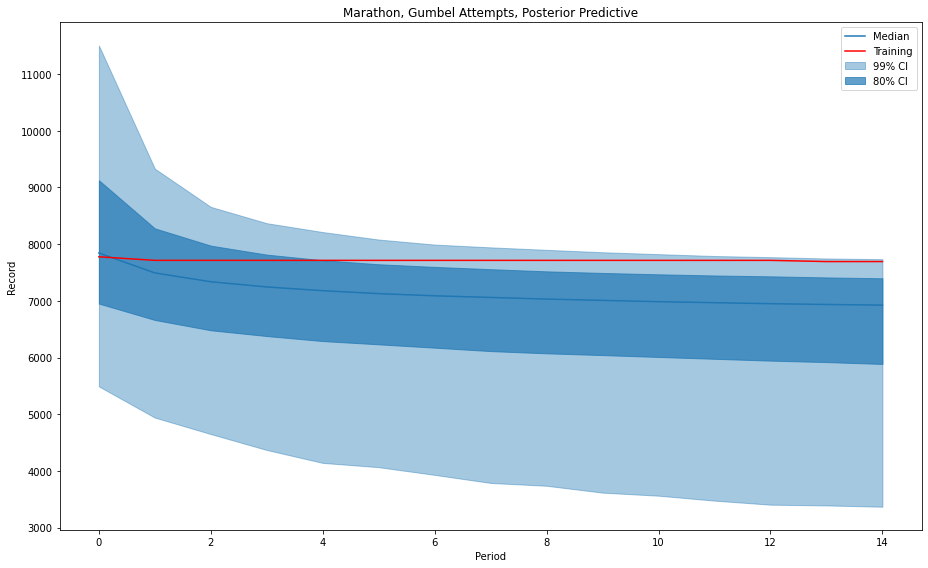

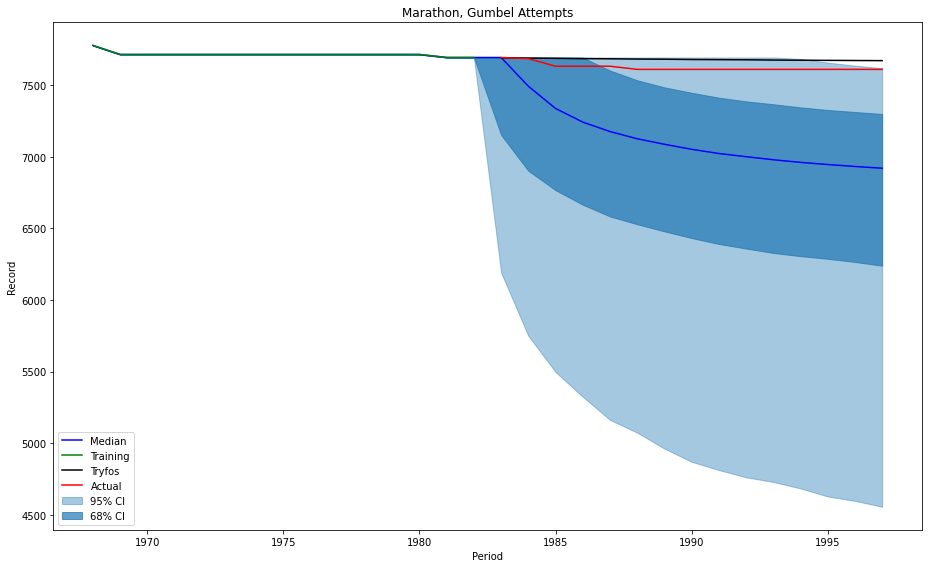

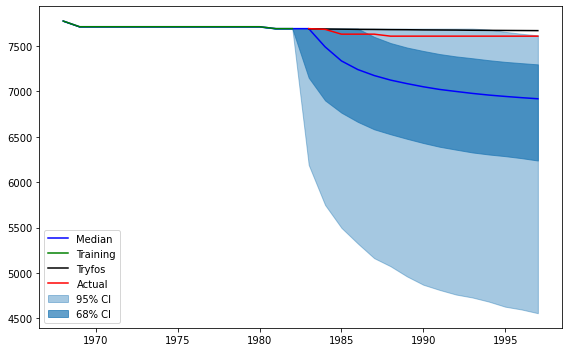

In [8]:
#whiches = ["1m", "5000m", "10000m", "Marathon"]
whiches = ["Marathon"]
#whiches = []

mses = {}
avg_log_probs = {}

fails = []

#whiches = ["1000m"]
for which in whiches:

    try:

        df = pd.read_csv("tryfos_data.csv")
        years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

        training_years = years[:15]
        training_records = records[:15]
        tryfos_years = years[15:]
        tryfos_fcast = records[15:]

        actual_df = pd.read_csv("tryfos_actual.csv")
        _, actual_records = actual_df["Year"].values, actual_df[which].values

        prior_parameters = {
                'mu' : {
                    'mean' : training_records[0],
                    'std' : 0.05*training_records[0],
                },
                'sigma' : {
                    'lam' : 1/(0.5*training_records[0])
                }
            }

        model = fm.ForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gumbel", 
                                    kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
        model.fit(chains=1)
        model.posterior_predictive()
        model.forecast()

        # MSE calculation
        median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
        bayes_mse = fm.mse(median, model.fcast_test_data)
        tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
        mses[which] = (bayes_mse, tryfos_mse)

        # Average logp
        avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])

        # Plots
        fig = plot_posterior_predictive(model, f"{which}, Gumbel Attempts, Posterior Predictive")
        fig.savefig(f"final_{which}_gumbel_attempts_post_pred.png")

        # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
        # fig.savefig(f"{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"final_{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"s_final_{which}_gumbel_attempts_forecast.png")



    except:
       print(f"Error: failed on {which}")
       fails.append(which)

array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'sigma'}>,
       <AxesSubplot:title={'center':'log_like_holdout'}>], dtype=object)

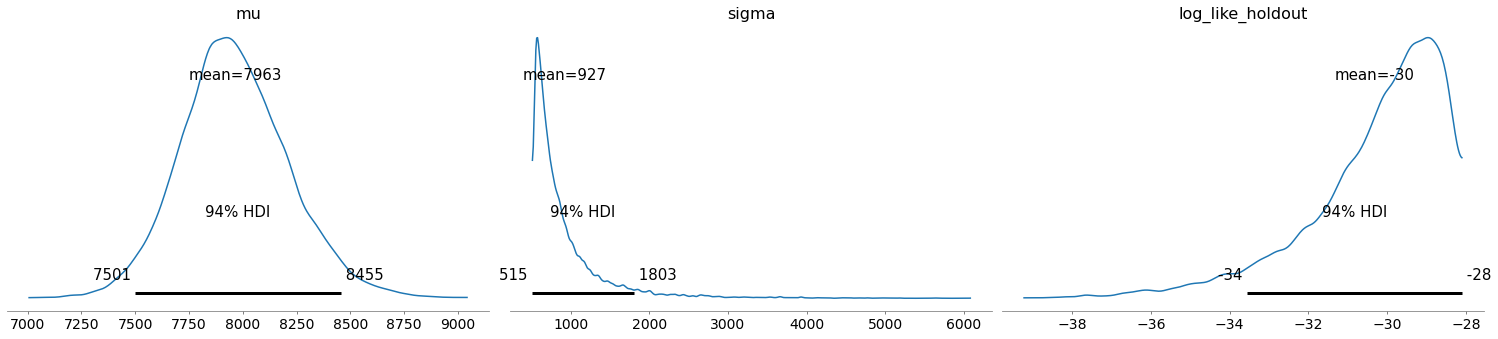

In [9]:
az.plot_posterior(model.trace)